# Import Libraries


This section is dedicated to reading in the files.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import json      # library for working with JSON-formatted text strings
import pprint as pp    # library for cleanly printing Python data structures
import seaborn as sns
from datetime import datetime
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker

# Table of Contents

1. [Style Updates](#style)<a name="style"></a><br>
2. [Load Data, Merge Files, Fix the Date](#load)<a name="load"></a><br>

 [~ ~ ~ Analysis ~ ~ ~ ](#anal)<a name="anal"></a><br>


3. [Total Tweets](#total)<a name="total"></a><br>
4. [Tweets About Climate Change](#cc)<a name="cc"></a><br>
5. ["Environmental" Tweets](#enviro)<a name="enviro"></a><br>
6. [EJ Within "Environmental" Tweets](#ej)<a name="ej"></a><br>






<br><br>
# 1. Style Updates <a id='style'></a>

**Stylistic Choices**

[array([0.24715576, 0.49918708, 0.57655991, 1.        ])]

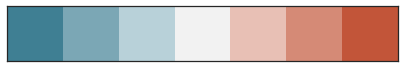

In [12]:
sns.set(style="white")

sns.palplot(sns.diverging_palette(220, 20, n=7))

# another option = sns.set(style="ticks")

#sns.set_palette("husl")

pal = sns.diverging_palette(220, 20, n=7)
color5= sns.diverging_palette(220, 20, n=5)
color2= sns.diverging_palette(220, 20, n=2)
color1= sns.diverging_palette(220, 20, n=1)
color10= sns.diverging_palette(220, 20, n=10)
palette="gist_ncar"
#just change this everytime:
palette=color1

big = sns.color_palette("Paired")
palette
palette

Color Palette template:
    
    https://seaborn.pydata.org/tutorial/color_palettes.html

Show Values on Bars Function

In [13]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


<br><br>
# 2. Load Data, Merge Files, Fix the Date <a id='style'></a>



this merges the Climate Declaration and NON Climate-Dec cities, as well as merges a table that identifies the accounts by City, type of department, and if the city has declared a CE. 

**Load files**

In [14]:
tweet = "Final Results.csv"
tweet = pd.read_csv(tweet)
tweet
len(tweet)

tweetsND = "Final Results ND.csv"
tweetsND = pd.read_csv(tweetsND)
tweetsND

accounts = "Case Study Accounts.csv"
accounts = pd.read_csv(accounts)


This merges the City Acconuts file, with info on type of dept, City, and CD (y/n)

In [15]:
# MERGED w/ City Accounts file
merged = pd.concat([tweet,tweetsND])
df = pd.merge(merged, accounts, on='user_ID', how='left')
len(df)

74049

**Fixes the date**

In [16]:
# ADD DATE IN generate result using pandas 
date = [] 
for x in df['time']: 
    data = datetime.strptime(x, "%Y-%m-%dT%H:%M:%S")
    date.append(data)
    
df["date"] = date   

#adds year column, makes it easier to group
df['year'] = pd.DatetimeIndex(df['date']).year

In [17]:
# CONVERTs TWEETs TO LOWER CASE FOR EASIER SEARCHING

#  BUTTTTT NOT NECESSARY INSTEAD JUST MAKE IT IF YOU use case=False 

'''CONVERT TWEET TO LOWER CASE FOR EASIER SEARCHING
# Series.str.lower
s = pd.Series(df.tweet)
lower = s.str.lower()
df['tweets'] = lower
df.head()
#len(s)
#df.str.lower()
#print(lower)'''

"CONVERT TWEET TO LOWER CASE FOR EASIER SEARCHING\n# Series.str.lower\ns = pd.Series(df.tweet)\nlower = s.str.lower()\ndf['tweets'] = lower\ndf.head()\n#len(s)\n#df.str.lower()\n#print(lower)"

<br><br>
# ~ ~ ~ ANALYSIS of the tweets ~  ~ ~  <a id='anal'></a>



<br><br>
# 3. Total Tweets <a id='total'></a>

**Overall Likes By Department Type, Likes Per Tweet**

Text(0, 0.5, '')

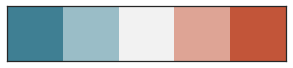

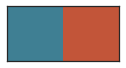

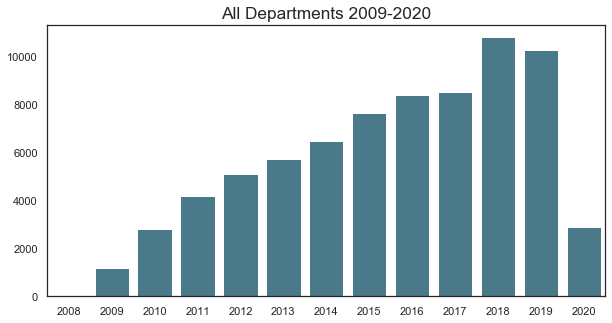

In [18]:
# Total Tweets per Year

pal = sns.diverging_palette(220, 20, n=7)
color5= sns.palplot(sns.diverging_palette(220, 20, n=5))
color2= sns.palplot(sns.diverging_palette(220, 20, n=2))
color1= sns.diverging_palette(220, 20, n=1)
palette=color1

plt.figure(figsize=(10,5))
tt= sns.countplot(data=df, x='year', palette=color1)
tt.set_title('All Departments 2009-2020',fontsize= 'x-large')
tt.set_xlabel("Year")
tt.set_xlabel('')
tt.set_ylabel('')

AxesSubplot(0.125,0.125;0.775x0.755)


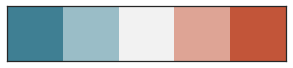

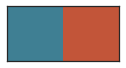

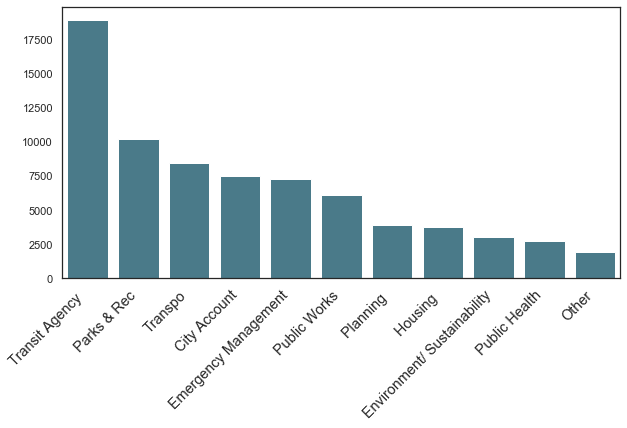

In [19]:
# Total Tweets per Department type

#dpt = sns.countplot(data=df, hue="Department", x='Department')
#dpt.set_title('Total Tweets Per Department Type ')
#dpt.set_xticks([])
#tt.set_xticklabels(labels, rotation=90)
#dpt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#p rint(dpt)
pal = sns.diverging_palette(220, 20, n=7)
color5= sns.palplot(sns.diverging_palette(220, 20, n=5))
color2= sns.palplot(sns.diverging_palette(220, 20, n=2))
color1= sns.diverging_palette(220, 20, n=1)
palette=color1

plt.figure(figsize=(10,5))
dpt2 = sns.countplot(data=df, x='Department', order = df['Department'].value_counts().index, palette=color1)
dpt2.set_title('', fontsize= 'x-large',)
dpt2.set_xticklabels(dpt2.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light',
    fontsize='large')
dpt2.set_xlabel('')
dpt2.set_ylabel('')

#dpt2.set_yticklabels(dpt2.get_yticklabels(), rotation=45, horizontalalignment='right', fontweight='light',fontsize='large')


print(dpt2)

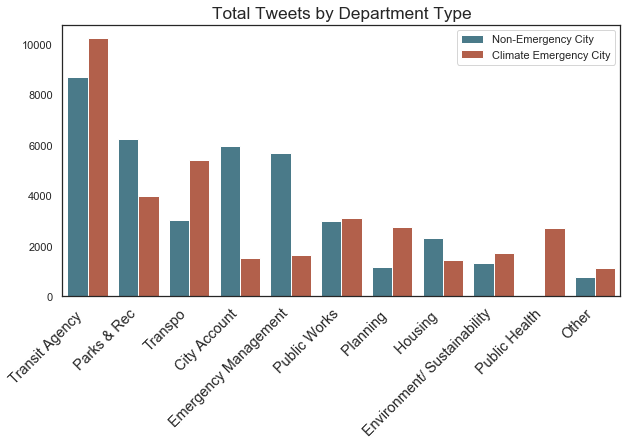

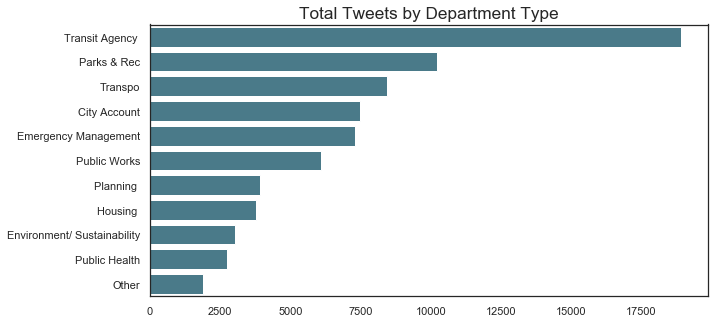

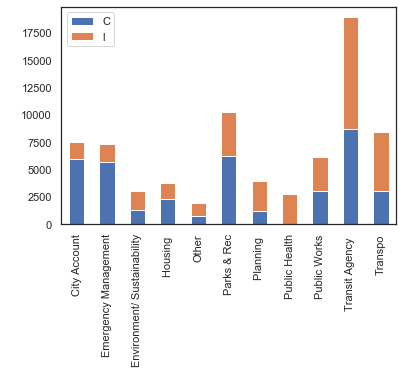

In [20]:
# Total Tweets by Cities that have and have not declared "Climate Emergency - by Department

pal = sns.diverging_palette(220, 20, n=7)
color5= sns.diverging_palette(220, 20, n=5)
color2= sns.diverging_palette(220, 20, n=2)
color1= sns.diverging_palette(220, 20, n=1)
palette=color2

plt.figure(figsize=(10,5))
ax = sns.countplot(x="Department", hue="Emergency", order = df['Department'].value_counts().index, data=df, palette=color2)
ax.set_title('Total Tweets by Department Type', fontsize='x-large')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light',
    fontsize='large')
ax.set_xlabel('')
ax.set_ylabel('')
plt.legend(title="", loc="upper right", labels = ["Non-Emergency City","Climate Emergency City"])
ax

plt.figure(figsize=(10,5))
ax = sns.countplot(y="Department", order = df['Department'].value_counts().index, data=df, palette=color1)
ax.set_title('Total Tweets by Department Type', fontsize='x-large')
ax.set_yticklabels(ax.get_yticklabels())
ax.set_xlabel('')
ax.set_ylabel('')
#plt.legend(title="", loc="upper right", labels = ["Non-Emergency City","Climate Emergency City"])
ax




df_plot = df.groupby(['Department', 'Emergency']).size().reset_index().pivot(columns='Emergency', index='Department', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.xlabel('')
# add the y-axis label
plt.ylabel("           ")
# add the legend
plt.legend('Climate Emergency')
# add the title
plt.title("")
# show the plot
plt.show()

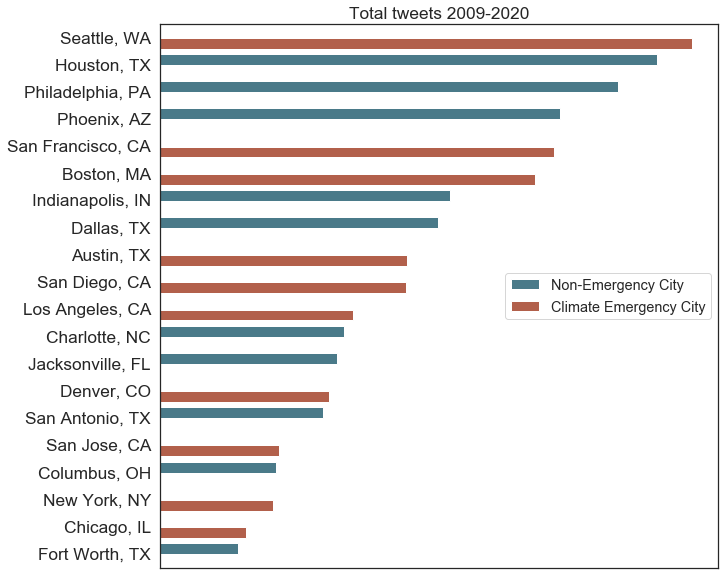

In [22]:
# Total Tweets per city 
plt.figure(figsize=(10,10))

pal = sns.diverging_palette(220, 20, n=7)
color5= sns.diverging_palette(220, 20, n=5)
color2= sns.diverging_palette(220, 20, n=2)
color1= sns.diverging_palette(220, 20, n=1)

#fig, ax = plt.subplots(1,1)
#ax.plot(x,y)
#tt.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#plt.show()

tt= sns.countplot(data=df, y='City', hue="Emergency", order = df['City'].value_counts().index, palette=color2)
tt.set_title('Total tweets 2009-2020', fontsize= 'x-large')
tt.set_xticklabels(tt.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light',
    fontsize='x-large')
tt.set_yticklabels(tt.get_yticklabels(), fontweight='light',verticalalignment='center',
    fontsize='x-large')
tt.set_xlabel('')
tt.set_ylabel('')
plt.legend(title="", loc="right", labels = ["Non-Emergency City","Climate Emergency City"], fontsize='large')

#tt.set_yticks(tt.get_yticks()[::1])

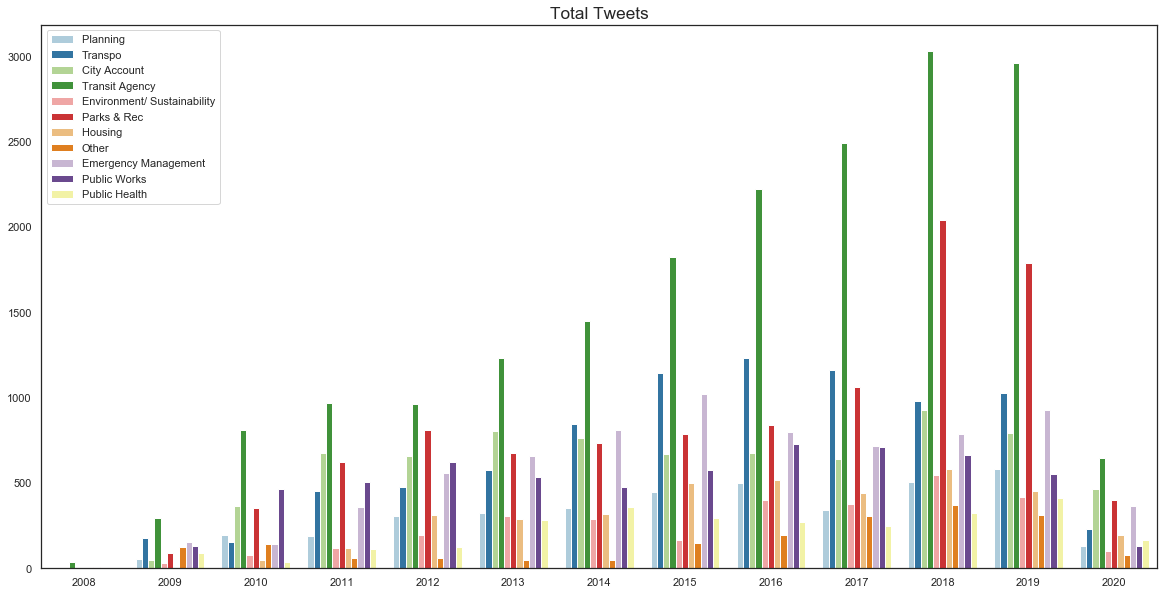

In [23]:
plt.figure(figsize=(20,10))

tt= sns.countplot(data=df, hue="Department", x='year', palette=big)
tt.set_title('Total Tweets',fontsize= 'x-large')
tt.set_ylabel("")
tt.set_xlabel("")
#tt.set_xticks([])
#tt.show()
plt.legend(title="", loc="upper left")

Text(0, 0.5, '')

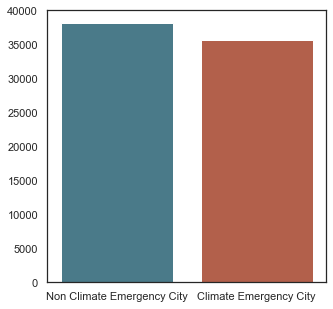

In [24]:
# Total Tweets by climate emergency

pal = sns.diverging_palette(220, 20, n=7)
color5= sns.diverging_palette(220, 20, n=5)
color2= sns.diverging_palette(220, 20, n=2)
color1= sns.diverging_palette(220, 20, n=1)




plt.figure(figsize=(5,5))
dpt = sns.countplot(data=df, x='Emergency', palette=color2)
dpt.set_title('', fontsize="x-large")
dpt.set_xticklabels(["Non Climate Emergency City","Climate Emergency City"])
#dpt.set_xticks('Climate Emergency City', "Non Climate Emergency")
#tt.set_xticklabels(labels, rotation=90)
#dpt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
dpt.set_xlabel('')
dpt.set_ylabel('')

[Text(0, 0, 'Planning '),
 Text(0, 0, 'Transpo'),
 Text(0, 0, 'City Account'),
 Text(0, 0, 'Transit Agency '),
 Text(0, 0, 'Environment/ Sustainability'),
 Text(0, 0, 'Parks & Rec'),
 Text(0, 0, 'Housing '),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Emergency Management'),
 Text(0, 0, 'Public Works'),
 Text(0, 0, 'Public Health')]

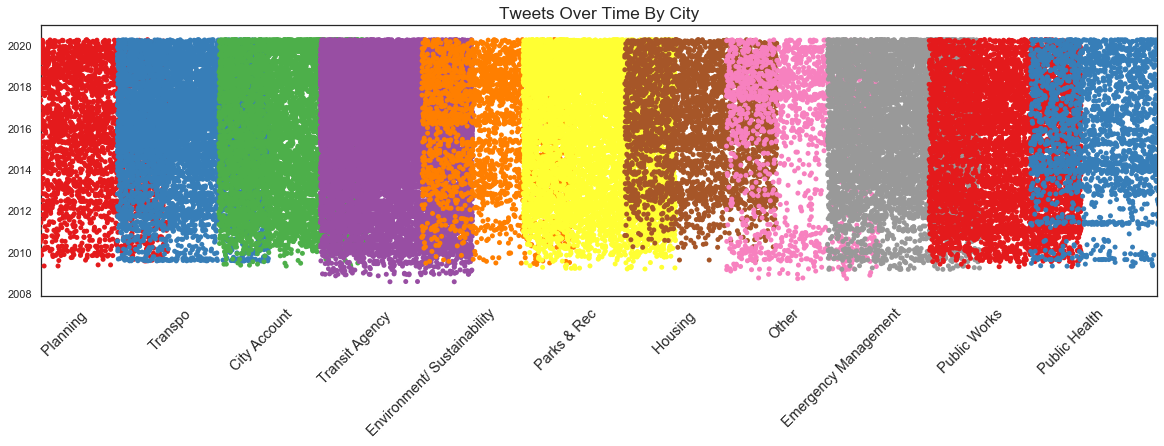

In [25]:
# tweets per city over time (stripplot )

plt.figure(figsize=(20,5))
ax = sns.stripplot(x='Department', y='date', jitter=.75,data=df, palette='Set1')

ax.set_title('Tweets Over Time By City', fontsize="x-large")
#ax.set_xticklabels("City")
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light',
    fontsize='large')


<br><br>
# 4. Tweets About Climate Change  <a id='cc'></a>






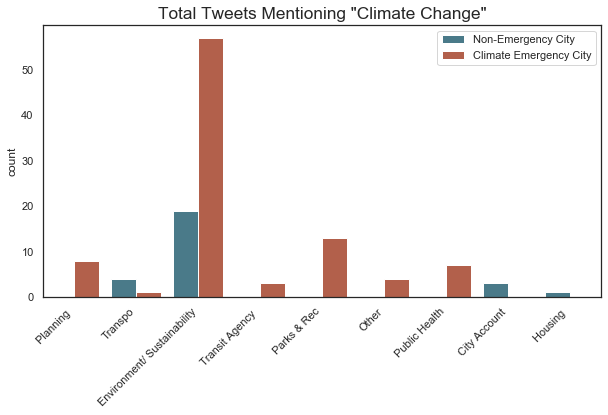

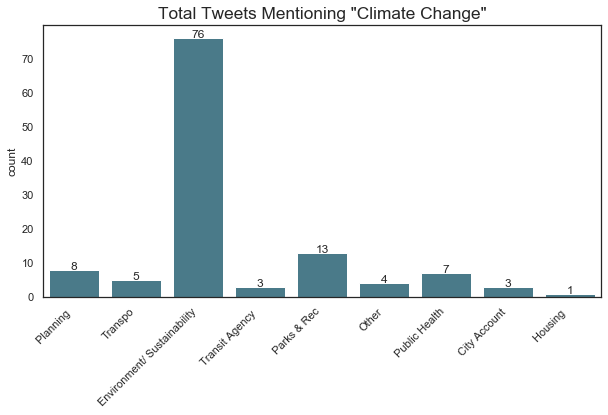

In [229]:
# Total Tweets Mentioning Climate Change by Cities that have and have not declared "Climate Emergency - by Department
pal = sns.diverging_palette(220, 20, n=7)
color5= sns.diverging_palette(220, 20, n=5)
color2= sns.diverging_palette(220, 20, n=2)
color1= sns.diverging_palette(220, 20, n=1)

plt.figure(figsize=(10,5))
cc = df.loc[(df['tweet'].str.contains('climate change',case=False))]
ax = sns.countplot(x="Department", hue="Emergency", data=cc, palette=color2)
ax.set_title('Total Tweets Mentioning "Climate Change"',fontsize= 'x-large')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
ax.set_xlabel('')

plt.legend(title="", loc="upper right", labels = ["Non-Emergency City","Climate Emergency City"])



#plt.legend(title="", loc="upper right", labels = ["Climate Emergency City", "Non-Emergency City"])


plt.figure(figsize=(10,5))
cc = df.loc[(df['tweet'].str.contains('climate change',case=False))]
ax = sns.countplot(x="Department", data=cc, palette=color1)
ax.set_title('Total Tweets Mentioning "Climate Change"',fontsize= 'x-large')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
ax.set_xlabel('')
show_values_on_bars(ax, "v", 0.3)

In [27]:
# NOT SURE IF THIS WORKS

df_plot = df.groupby(['Department', 'tweet']).size().reset_index().pivot(columns='Department', index='tweet', values=0)
df_plot.plot(kind='bar', stacked=True)


Text(0.5, 0, '')

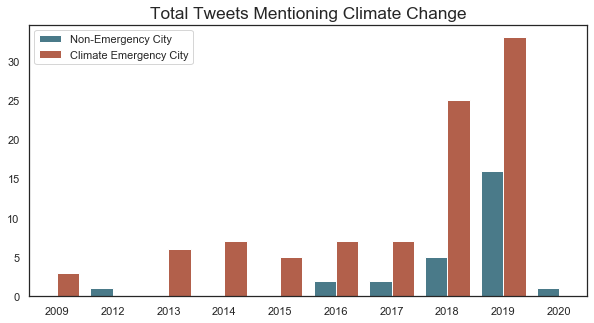

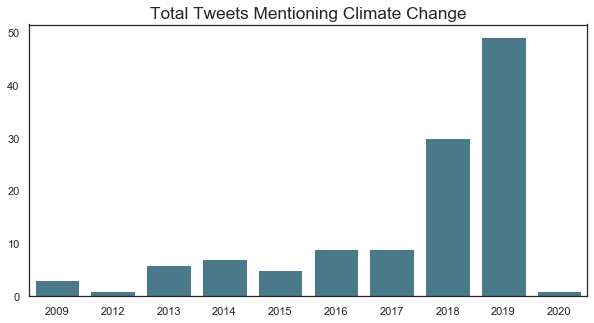

In [28]:
# Total Tweets per Year


plt.figure(figsize=(10,5))
cc = df.loc[(df['tweet'].str.contains('climate change',case=False))]

tt= sns.countplot(data=cc, hue="Emergency", x='year', palette=color2)
tt.set_title('Total Tweets Mentioning Climate Change',fontsize= 'x-large')
tt.set_ylabel("")
tt.set_xlabel("")
#tt.set_xticks([])
#tt.show()
plt.legend(title="", loc="upper left", labels = ["Non-Emergency City","Climate Emergency City"])



plt.figure(figsize=(10,5))
cc = df.loc[(df['tweet'].str.contains('climate change',case=False))]

tt= sns.countplot(data=cc, x='year', palette=color1)
tt.set_title('Total Tweets Mentioning Climate Change',fontsize= 'x-large')
tt.set_ylabel("")
tt.set_xlabel("")
#tt.set_xticks([])
#tt.show()


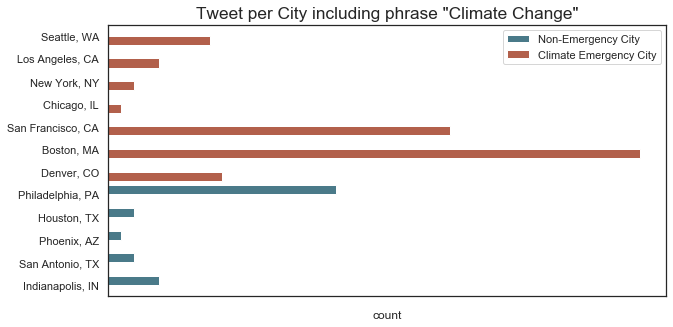

In [32]:
# Tweets Per City Containing Climate Change

plt.figure(figsize=(10,5))
cc = df.loc[(df['tweet'].str.contains('climate change',case=False))]
ax = sns.countplot(data=cc, hue="Emergency", y='City', palette=color2)
#ax.set_xticklabels(labels= x, rotation=90)
ax.set_ylabel('')
ax.set_title('Tweet per City including phrase "Climate Change"',fontsize= 'x-large')
#ax.set_xticks('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#ax.legend()
plt.legend(title="", loc="upper right", labels = ["Non-Emergency City","Climate Emergency City"])

**Stripplot Versions**

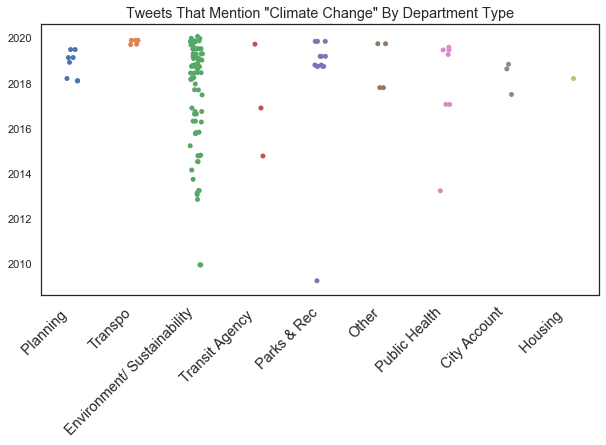

<Figure size 720x360 with 0 Axes>

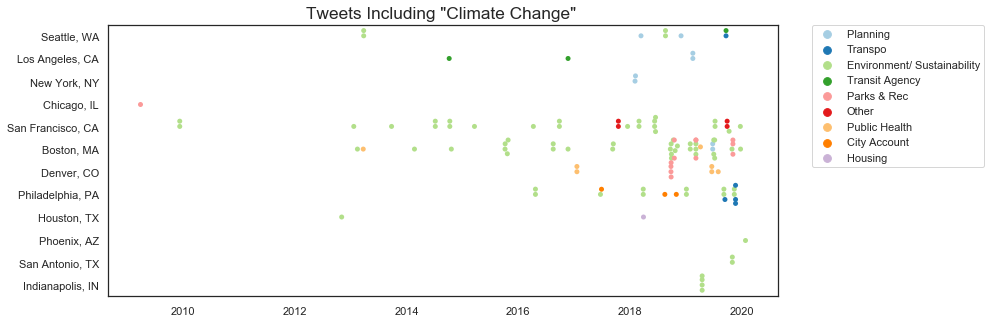

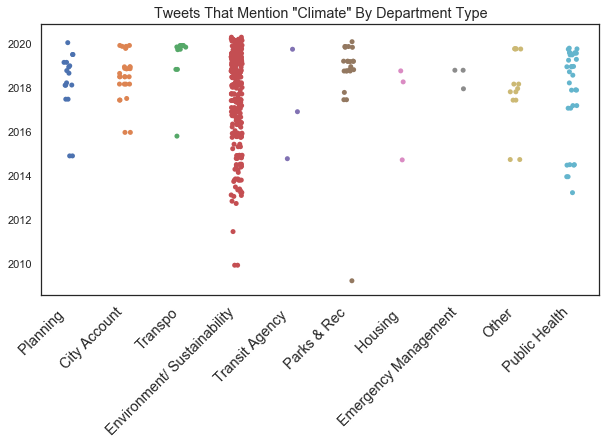

<Figure size 720x360 with 0 Axes>

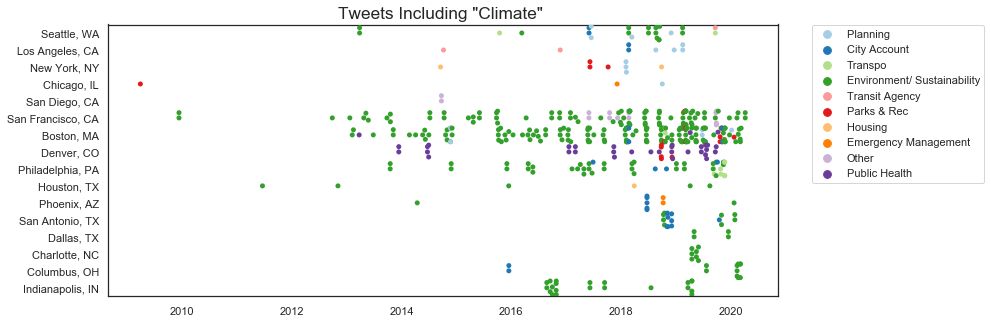

In [33]:
# total CC tweets by dept type over time (stripplot)


plt.figure(figsize=(10,5))
cc = df.loc[(df['tweet'].str.contains('climate change', case=False))]
ax = sns.stripplot(x='Department', y='date', data=cc)

plt.figure(figsize=(10,5))
ax.set_title('Tweets That Mention "Climate Change" By Department Type', fontsize="large")
#ax.set_xticklabels("City")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light',
    fontsize='large')
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('')
ax.set_ylabel('')

#plt.show()


#Tweets About Sustainability Over Time By City

plt.show()
plt.figure(figsize=(12,5))
df_s = df.loc[(df['tweet'].str.contains('climate change',  case=False))]
ax = sns.swarmplot(x='date', y='City', data=df_s, hue="Department", palette=big)
ax.set_title('Tweets Including "Climate Change" ',fontsize= 'x-large',)
#ax.set_xticklabels("City")
ax.set_ylabel('')
ax.set_xlabel('')
ax.get_xticklabels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


#plt.show()
# df = pd.DataFrame(['hello', 'world', 'hehe'], columns=['words'])

#df.loc[(df['tweets'].str.count("climate change|wo"))]



plt.figure(figsize=(10,5))
cc = df.loc[(df['tweet'].str.contains('climate', case=False))]
ax = sns.stripplot(x='Department', y='date', data=cc)

plt.figure(figsize=(10,5))
ax.set_title('Tweets That Mention "Climate" By Department Type', fontsize="large")
#ax.set_xticklabels("City")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light',
    fontsize='large')
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('')
ax.set_ylabel('')

#plt.show()


#Tweets About Sustainability Over Time By City

plt.show()
plt.figure(figsize=(12,5))
df_s = df.loc[(df['tweet'].str.contains('climate',  case=False))]
ax = sns.swarmplot(x='date', y='City', data=df_s, hue="Department", palette=big)
ax.set_title('Tweets Including "Climate" ',fontsize= 'x-large',)
#ax.set_xticklabels("City")
ax.set_ylabel('')
ax.set_xlabel('')
ax.get_xticklabels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


#plt.show()
# df = pd.DataFrame(['hello', 'world', 'hehe'], columns=['words'])

#df.loc[(df['tweets'].str.count("climate change|wo"))]

Text(0, 0.5, '')

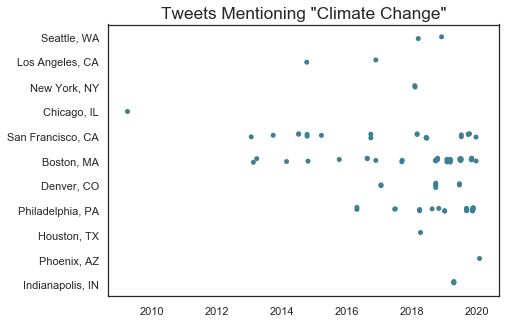

In [34]:
# tweets about CC per city over time? 

plt.figure(figsize=(7,5))
cc = df.loc[(df['tweet'].str.contains('climate change'))]
ax = sns.stripplot(y='City', x='date', data=cc, palette=color1)

ax.set_title('Tweets Mentioning "Climate Change"', fontsize= 'x-large')
#ax.set_xticklabels("City")
ax.set_xlabel('')
ax.set_ylabel('')
#ax.set_xticks([])
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#plt.show()


<br><br>
# 5. "Environmental" Tweets  <a id='enviro'></a>

**Identify the Key Words in "Environmentalism"** 

In [38]:
#Different key words over time 

# climate change | global warming | sea level rise | greenhouse gas | emissions | resilience | 
# sustainable | sustainability | green | carbon | emissions

words = ["climate", "climate change", "climate justice","global warming","sea level rise", "greenhouse gas", "emissions", 
         "resilience", "sustainable", 
         "sustainability", "green", "carbon", "environmental justice", "pollution", "environmental"]
words


['climate',
 'climate change',
 'climate justice',
 'global warming',
 'sea level rise',
 'greenhouse gas',
 'emissions',
 'resilience',
 'sustainable',
 'sustainability',
 'green',
 'carbon',
 'environmental justice',
 'pollution',
 'environmental']

**"Environmentalism" - all the key words grouped together**

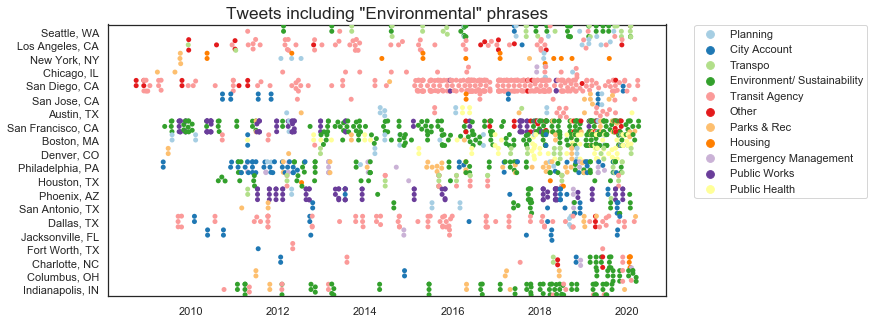

In [283]:
#Tweets About Sustainability Over Time By City

plt.show()
plt.figure(figsize=(10,5))
df_s = df.loc[(df['tweet'].str.contains('climate | climate change | global warming | sea level rise | greenhouse gas | emissions | resilience | sustainable | sustainability | green | carbon | environmental justice | pollution | environmental',
                                       case=False))]
ax = sns.swarmplot(x='date', y='City', data=df_s, hue="Department", palette=big)
ax.set_title('Tweets including "Environmental" phrases',fontsize= 'x-large',)
#ax.set_xticklabels("City")
ax.set_xlabel('')
ax.set_ylabel('')
ax.get_xticklabels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


#plt.show()
# df = pd.DataFrame(['hello', 'world', 'hehe'], columns=['words'])

#df.loc[(df['tweets'].str.count("climate change|wo"))]

Text(0.5, 0, 'Year')

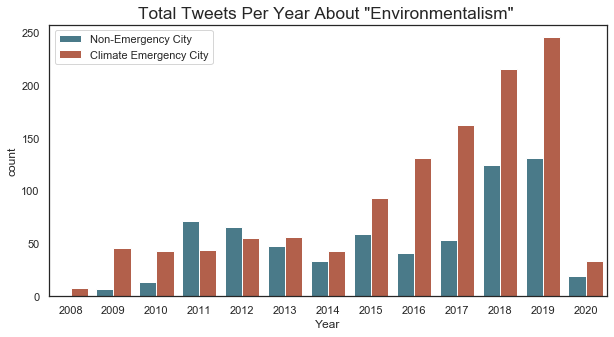

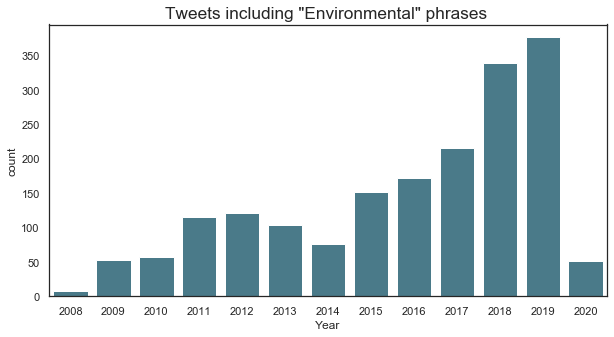

In [36]:
plt.figure(figsize=(10,5))
df_s = df.loc[(df['tweet'].str.contains('climate | climate change | climate justice | global warming | sea level rise | greenhouse gas | emissions | resilience | sustainable | sustainability | green | carbon | environmental justice | pollution | environmental',
                                       case=False))]
tt= sns.countplot(data=df_s, hue="Emergency", x='year', palette=color2)
tt.set_title('Total Tweets Per Year About "Environmentalism" ',fontsize= 'x-large')
tt.set_xlabel("Year")
#tt.set_xticks([])
#tt.show()
plt.legend(title="", loc="upper left", labels = ["Non-Emergency City","Climate Emergency City"])

plt.figure(figsize=(10,5))
df_s = df.loc[(df['tweet'].str.contains('climate | climate change | climate justice | global warming | sea level rise | greenhouse gas | emissions | resilience | sustainable | sustainability | green | carbon | environmental justice | pollution | environmental',
                                       case=False))]
tt= sns.countplot(data=df_s, x='year', palette=color1)
tt.set_title('Tweets including "Environmental" phrases ',fontsize= 'x-large')
tt.set_xlabel("Year")
#tt.set_xticks([])
#tt.show()

In [39]:
cc = []
keys = ["climate change", "climatechange"]

for tweet in df['tweet']:
    match = False 
    for key in keys: 
        if key.lower() in tweet:
            match = True
            break
    cc.append(1 if match else 0)
        
df['cc'] = cc



enviro = []
words

for tweet in df['tweet']:
    match = False 
    for key in keys: 
        if key.lower() in tweet:
            match = True
            break
    enviro.append(1 if match else 0)
        
df['enviro'] = enviro
df['enviro'].sum()


142

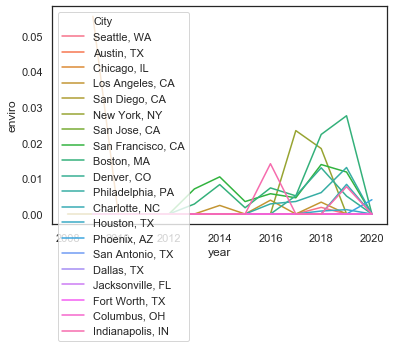

In [41]:

sns.lineplot(x='year', y = "enviro", hue="City", data=df, err_style=None)

**Comparing Different Words**



Creating Dummy Variables for "tweet contains _____"

In [42]:
# For LOOP To make dummies of all the words w/COLUMNS YES !!! 

contains = []
for i in words:
    df[i] = df['tweet'].str.contains(i, case=False, regex=True).astype(int) 
    contains.append(df[i])
    
# contains IS THE NEW DATAFRAME WITH DUMMIES FOR EACH WORD
contains

copy = df[words].copy()
copy
copy = copy.sum(axis=0) 
copy.astype



<bound method NDFrame.astype of climate                   480
climate change            120
climate justice             4
global warming              3
sea level rise             16
greenhouse gas             28
emissions                 122
resilience                 65
sustainable               167
sustainability            207
green                    2064
carbon                    144
environmental justice      12
pollution                  81
environmental             219
dtype: int64>

In [279]:
copy

copy.value_counts().index
copy =copy.sort_values()

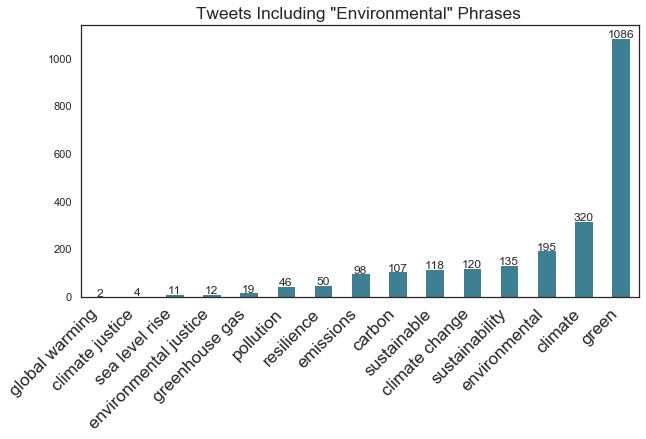

<Figure size 720x360 with 0 Axes>

In [280]:
# order = tif['planarea'].value_counts().index)
# order = o
# o = ['Highest', 'High', 'Medium', 'Low', 'Lowest']



plt.figure(figsize=(10,5))
ax = copy.plot.bar(color=color1)

plt.figure(figsize=(10,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right",
                   fontsize='x-large')
ax.set_title('Tweets Including "Environmental" Phrases ',fontsize= 'x-large')


show_values_on_bars(ax, "v", 0.3)

In [43]:
# Groupiing all the dummy variables by City & Department 
df_grp = df.groupby(['City', 'Department', "year"])[words].sum().reset_index()
df_grp2 = df.groupby(['City'])[words].sum().reset_index()


In [44]:
df_grp2['climate change']
df_grp2.City

0            Austin, TX
1            Boston, MA
2         Charlotte, NC
3           Chicago, IL
4          Columbus, OH
5            Dallas, TX
6            Denver, CO
7        Fort Worth, TX
8           Houston, TX
9      Indianapolis, IN
10     Jacksonville, FL
11      Los Angeles, CA
12         New York, NY
13     Philadelphia, PA
14          Phoenix, AZ
15      San Antonio, TX
16        San Diego, CA
17    San Francisco, CA
18         San Jose, CA
19          Seattle, WA
Name: City, dtype: object

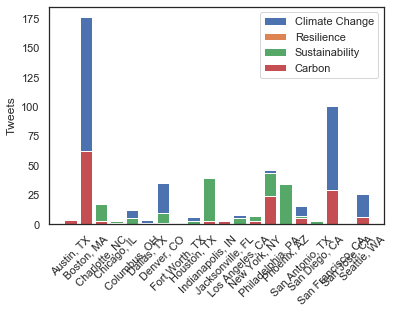

NameError: name 'df_grp3' is not defined

In [45]:
# create a line plot for the first class
# label this line as class one for the legend
plt.bar(df_grp2.City, df_grp2['climate'], label = "Climate Change")
plt.xticks(rotation=45)

# create a line plot for the second class
# label this line as class two for the legend
plt.bar(df_grp2.City, df_grp2.resilience, label = "Resilience")
plt.bar(df_grp2.City, df_grp2.sustainability, label = "Sustainability")
plt.bar(df_grp2.City, df_grp2.carbon, label = "Carbon")

#    GREEN MAKES IT HARD TO SEE THE OTHERS
#plt.bar(df_grp2.City, df_grp2.green, label = "green")


# add the x-axis label
plt.xlabel('')
# add the y-axis label
plt.ylabel("Tweets")
# add the legend
plt.legend()
# add the title
plt.title("")
# show the plot
plt.show()


# create a line plot for the first class
# label this line as class one for the legend
plt.bar(df_grp3.Department, df_grp3.climate, label = "Climate")
plt.xticks(rotation=45)

# create a line plot for the second class
# label this line as class two for the legend
plt.bar(df_grp3.Department, df_grp3.resilience, label = "Resilience")

plt.bar(df_grp3.Department, df_grp3.sustainability, label = "Sustainability")

#    GREEN MAKES IT HARD TO SEE THE OTHERS
#plt.bar(df_grp2.City, df_grp2.green, label = "green")


# add the x-axis label
plt.xlabel('')
# add the y-axis label
plt.ylabel("Tweets")
# add the legend
plt.legend()
# add the title
plt.title("")
# show the plot
plt.show()

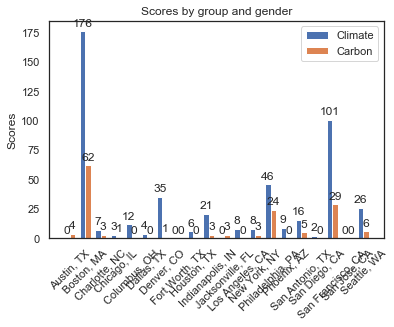

In [47]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = df_grp2['City']
men_means = df_grp2['climate']
women_means = df_grp2['carbon']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Climate')
rects2 = ax.bar(x + width/2, women_means, width, label='Carbon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.xticks(rotation=45)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

#fig.loose_layout()
#plt.subplots(constrained_layout=True)

plt.show()

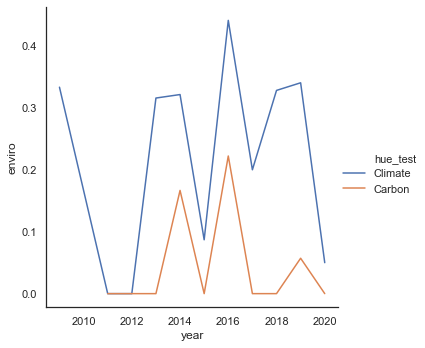

In [48]:
#df['hue_test']  = "Other"
df.loc[df["climate"] == 1, 'hue_test'] = "Climate"
df.loc[df["carbon"] == 1, 'hue_test'] = "Carbon"
df['tweeted'] = 1
df['hue_test'].value_counts()
sns.relplot(x="year", y="enviro", hue="hue_test", kind="line", data=df, err_style=None)

In [49]:
df_grp3 = df.groupby(['Department'])[words].sum().reset_index()
df_grp3

,Department,climate,climate change,climate justice,global warming,sea level rise,greenhouse gas,emissions,resilience,sustainable,sustainability,green,carbon,environmental justice,pollution,environmental
0,City Account,29,3,0,0,2,1,6,3,13,39,125,4,1,7,22
1,Emergency Management,3,0,0,0,0,0,0,11,0,1,18,24,0,2,1
2,Environment/ Sustainability,343,76,4,2,5,16,65,23,71,88,478,71,7,35,78
3,Housing,3,1,0,0,0,0,3,3,1,4,47,3,0,4,1
4,Other,14,4,0,0,5,0,23,8,0,3,57,0,2,1,15
5,Parks & Rec,23,13,0,0,2,0,6,4,2,7,231,4,1,4,24
6,Planning,17,8,0,0,2,0,0,11,14,5,86,2,0,3,14
7,Public Health,33,7,0,0,0,3,7,1,11,10,54,30,1,5,32
8,Public Works,0,0,0,0,0,4,4,0,40,38,212,0,0,12,10
9,Transit Agency,3,3,0,1,0,4,5,1,6,9,590,2,0,8,12


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

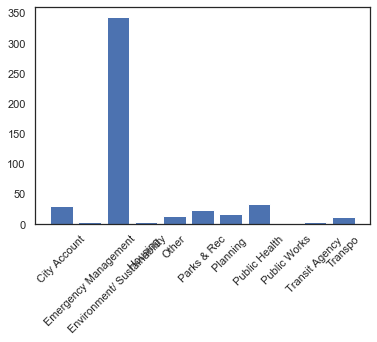

In [51]:
plt.bar(df_grp3.Department, df_grp3.climate, label = "Climate")
plt.xticks(rotation=45)


<br><br>
# 6. EJ in "Environmental" Tweets  <a id='ej'></a>

In [56]:

race = ["justice", "race", 'racial', "equity", "racism"]


In [57]:
#Discourse within Environmentalism Tweets

# For LOOP To make dummies of all the words w/COLUMNS YES !!! 


df_s = df.loc[(df['tweet'].str.contains('climate | climate change | global warming | sea level rise | greenhouse gas | emissions | resilience | sustainable | sustainability | green | carbon | environmental justice | pollution | environmental',
                                       case=False))]

race = ["justice", "race", 'racial', "equity", "racism"]


contains = []
for i in race:
    df_s[i] = df_s['tweet'].str.contains(i, case=False, regex=True).astype(int) 
    contains.append(df[i])
    
# contains IS THE NEW DATAFRAME WITH DUMMIES FOR EACH WORD
contains

copy1 = df_s[race].copy()
copy1
copy1 = copy1.sum(axis=0) 
copy1.astype


plt.figure(figsize=(10,5))
ax = copy1.plot.bar(color=color1)

plt.figure(figsize=(10,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right",
                   fontsize='x-large')


ax.set_title('', fontsize='x-large')
show_values_on_bars(ax, "v", 0.3)

C:\Users\brown\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


KeyError: 'justice'